# Domain Knowledge
Haberman’s data set contains data from the study conducted in University of Chicago’s Billings Hospital between year 1958 to 1970 for the patients who undergone surgery of breast cancer. 

Source :https://www.kaggle.com/gilsousa/habermans-survival-data-set)

There are 4 attribute in this data set out of which 3 are features and 1 class attribute as below. Also, there are 306 instances of data.

            1.Number of Axillary nodes(Lymph Nodes)
            2.Age
            3.Operation Year
            4.Survival Status
   

 <img src="https://miro.medium.com/max/960/1*WWnOEUYNCiFh0f3rwjFhsA.jpeg">
    

Lymph Node: Lymph nodes are small, bean-shaped organs that act as filters along the lymph fluid channels. As lymph fluid leaves  the breast and eventually goes back into the bloodstream, the lymph nodes try to catch and trap cancer cells before they reach other parts of the body. Having cancer cells in the lymph nodes under your arm suggests an increased risk of the cancer spreading.In our data it is axillary nodes detected(0–52)

Age: It represent the age of patient at which they undergone surgery (age from 30 to 83)

Operation year: Year in which patient was undergone surgery(1958–1969)

Survival Status: It represent whether patient survive more than 5 years or less after undergone through surgery.Here if patients survived 5 years or more is represented as 1 and patients who survived less than 5 years is represented as 2.

# Objectives of this project
1. To know the characteristics  of this dataset
2. To explore the hidden insights and diffrent relationship among variables of this dataset
3. To build a predictive mechine learning model for survival prediction

# Exploratory Data Analysis and Descriptive Statistics

# Descriptive Statistics


In [6]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [7]:
#reading dataset
df = pd.read_csv('E:\ASDS\Python for DS\haberman.csv')

In [8]:
#viewing the top 5 rows of dataset
df.head()

,age,operation_year,axil_nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [9]:
#viewing  dataset columns
df.columns

Index(['age', 'operation_year', 'axil_nodes', 'status'], dtype='object')

In [10]:
# viewing dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age               306 non-null int64
operation_year    306 non-null int64
axil_nodes        306 non-null int64
status            306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [11]:
#viewing dataset shape
df.shape

(306, 4)

<img src="https://scontent.fdac48-1.fna.fbcdn.net/v/t1.0-9/68740566_2350030848589892_169939537936515072_n.jpg?_nc_cat=108&_nc_oc=AQmyvL9FNOTnGwKVBXrvODK7oxBYIwjFCFP0BaB_Hvka6Nmzhbxxg1j8wWc37O_i9CE&_nc_ht=scontent.fdac48-1.fna&oh=47f74e20995538d2a90cbdff1e2fac20&oe=5E014A1D">

In [12]:
#descriptive statistics summary
df.describe()

,age,operation_year,axil_nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [13]:
# descriptive statistics mode
df.mode()

,age,operation_year,axil_nodes,status
0,52,58,0,1


In [14]:
#descriptive statistics median
df.median()

age               52.0
operation_year    63.0
axil_nodes         1.0
status             1.0
dtype: float64

In [15]:
#descriptive statistics covariance
df.cov()

,age,operation_year,axil_nodes,status
age,116.714583,3.142912,-4.907082,0.324397
operation_year,3.142912,10.558631,-0.087946,-0.006847
axil_nodes,-4.907082,-0.087946,51.691118,0.911090
status,0.324397,-0.006847,0.911090,0.195275


In [16]:
#descriptive statistics corelation
df.corr()

,age,operation_year,axil_nodes,status
age,1.000000,0.089529,-0.063176,0.067950
operation_year,0.089529,1.000000,-0.003764,-0.004768
axil_nodes,-0.063176,-0.003764,1.000000,0.286768
status,0.067950,-0.004768,0.286768,1.000000


In [17]:
df.skew()

age               0.146505
operation_year    0.078755
axil_nodes        2.983823
status            1.071928
dtype: float64

In [18]:
df.kurtosis()

age               -0.589393
operation_year    -1.118826
axil_nodes        11.730877
status            -0.856611
dtype: float64

# Exploring the Dataset

<img src="https://datavizcatalogue.com/methods/images/anatomy/box_plot.png">


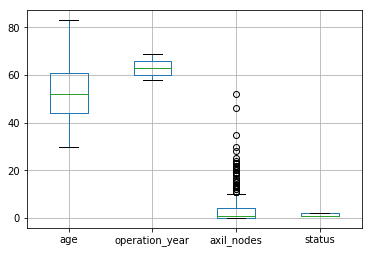

In [19]:
#Boxplot of whole Dataset
df.boxplot()
plt.show()

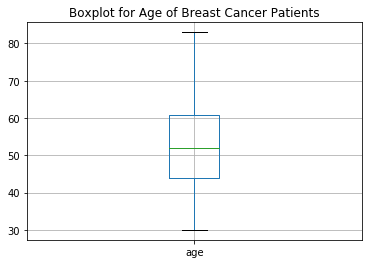

In [20]:
#Boxplot of a single variable
df.boxplot('age')
plt.title('Boxplot for Age of Breast Cancer Patients')
plt.show()

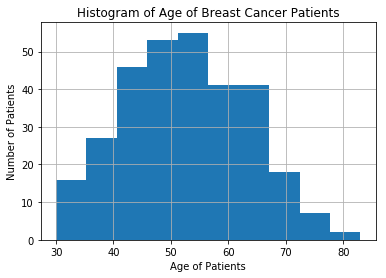

In [21]:
#Histogram of Age Distribution
df.hist('age',bins=10)
plt.xlabel('Age of Patients')
plt.ylabel('Number of Patients')
plt.title('Histogram of Age of Breast Cancer Patients')
plt.show()

<Figure size 792x288 with 0 Axes>

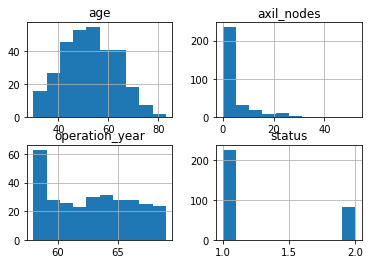

In [22]:
#Histogram of Dataset
plt.figure(figsize=(11,4))
df.hist(bins=10)
plt.show()

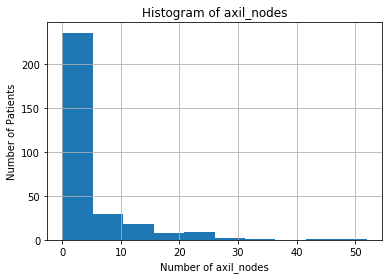

In [23]:
#Histogram of  Axil Nodes
df.hist('axil_nodes',bins=10)
plt.title('Histogram of axil_nodes')
plt.ylabel('Number of Patients')
plt.xlabel('Number of axil_nodes')
plt.show()

In [24]:
#Status count
df.status.value_counts()

1    225
2     81
Name: status, dtype: int64

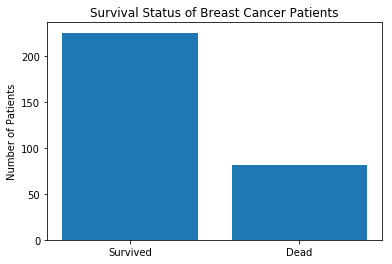

In [25]:
#Status count
objects = ('Survived', 'Dead')
x_pos = np.arange(len(objects))
#status_fre=[225, 81] # get the frequency value from h_data.status.value_counts()
status_fre=df.status.value_counts()
plt.bar(x_pos, status_fre)
plt.xticks(x_pos, objects)
plt.ylabel('Number of Patients')
plt.title('Survival Status of Breast Cancer Patients')
plt.show()

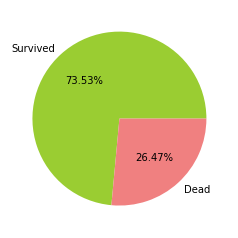

In [26]:
#status pi chart
status_fre=df.status.value_counts()
plt.pie(status_fre, labels=['Survived', 'Dead'], colors=['yellowgreen', 'lightcoral'],  autopct='%.2f%%')
plt.show()

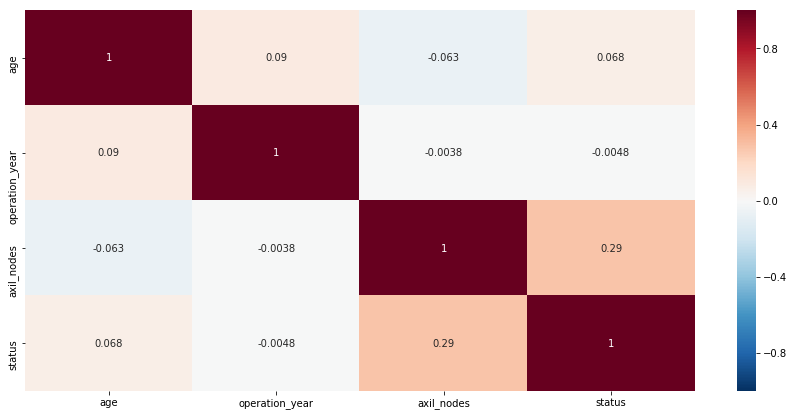

In [27]:
#Generating Heatmap
correlation = df.corr()
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.show()

In [28]:
# Ordering value of R in Descending order
correlation['status'].sort_values(ascending=False)

status            1.000000
axil_nodes        0.286768
age               0.067950
operation_year   -0.004768
Name: status, dtype: float64

[Text(0, 0.5, 'axil_nodes'),
 Text(0.5, 0, ' status'),
 Text(0.5, 1.0, 'Survive vs Axil Nodes')]

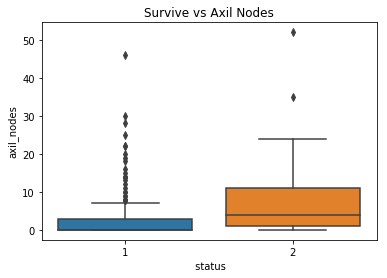

In [31]:
bxplt = sns.boxplot(x="status", y='axil_nodes', data = df)
bxplt.set(xlabel=' status', ylabel='axil_nodes', title='Survive vs Axil Nodes')

[Text(0, 0.5, 'axil_nodes'),
 Text(0.5, 0, ' status'),
 Text(0.5, 1.0, 'Survive vs Age')]

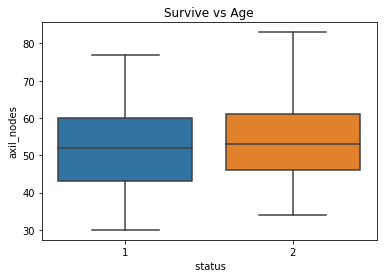

In [41]:
bxplt = sns.boxplot(x="status", y='age', data = df)
bxplt.set(xlabel=' status', ylabel='axil_nodes', title='Survive vs Age')

C:\Users\FAZLY\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


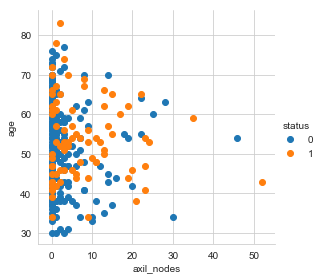

In [63]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="status", size=4) \
   .map(plt.scatter, "axil_nodes", "age") \
   .add_legend();
plt.show();

C:\Users\FAZLY\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


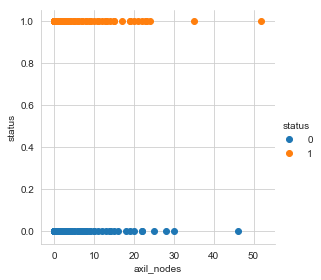

In [64]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="status", size=4) \
   .map(plt.scatter, "axil_nodes", "status") \
   .add_legend();
plt.show();

C:\Users\FAZLY\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


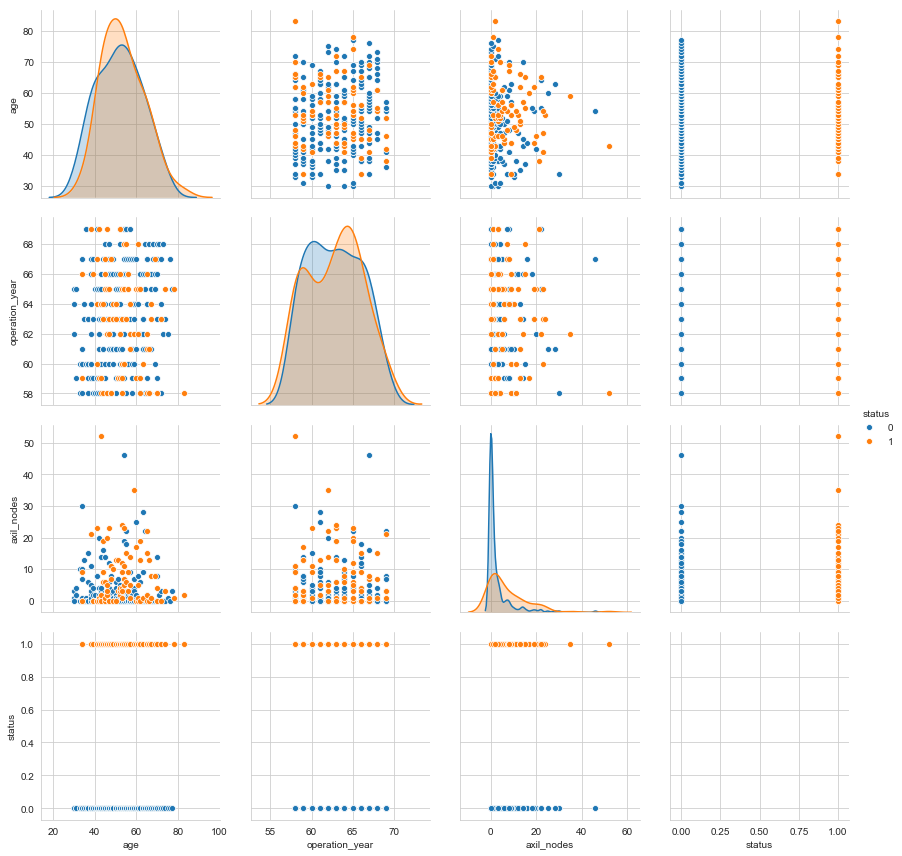

In [61]:

#Pairplot
sns.set_style("whitegrid");
sns.pairplot(df, hue="status", size=3);
plt.show()

# Machine Learning - Logistic Regression

In [42]:
#Features and Target variable 
features=['age','operation_year','axil_nodes']
x=df[features]
df['status']=df['status'].map({1:0, 2:1})
y=df.status

 <img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1543836883/image_6_cfpjpr.png">

In [44]:
#Train -test Splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\Users\FAZLY\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
#Model performance Report
print('Coefficients:', logreg.coef_)
print('Intercept:', logreg.intercept_)
 
predictions = logreg.predict(x_test)
print('Classification Report:\n',classification_report(y_test, predictions))

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test,predictions ))

Coefficients: [[ 0.01561728 -0.03196984  0.07055597]]
Intercept: [-0.06295351]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90        60
           1       1.00      0.18      0.30        17

   micro avg       0.82      0.82      0.82        77
   macro avg       0.91      0.59      0.60        77
weighted avg       0.85      0.82      0.76        77

Confusion Matrix:
 [[60  0]
 [14  3]]
Accuracy Score: 0.8181818181818182
Precision: 1.0
Recall: 0.17647058823529413


 <img src="https://2.bp.blogspot.com/-uCi_IXC-5C0/W4lDTCG8SnI/AAAAAAAABIo/kxasPdWoA107m1qazYXvHsCy6Q9h1QBSwCEwYBhgL/s1600/xxx.png">

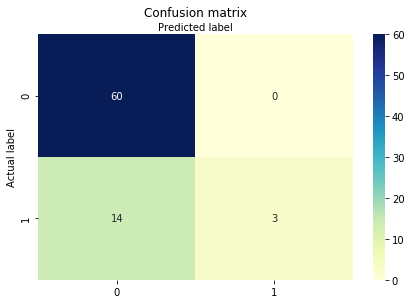

In [47]:
#visualizing Confusion Matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
###create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, predictions)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

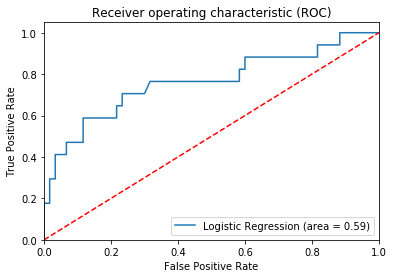

In [48]:
#Visualizing RoC Graph
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [66]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

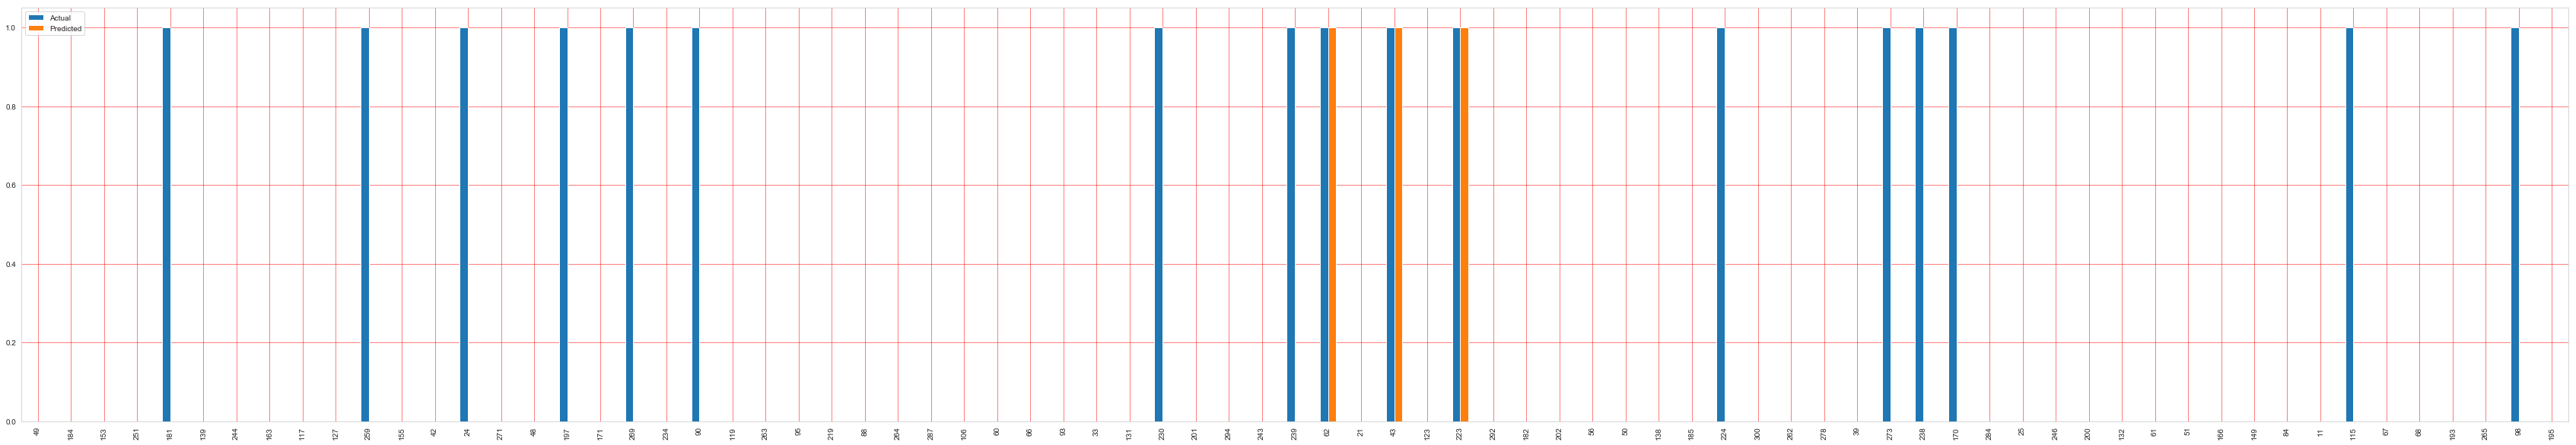

In [68]:
df2.plot(kind='bar',figsize=(60,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

C:\Users\FAZLY\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


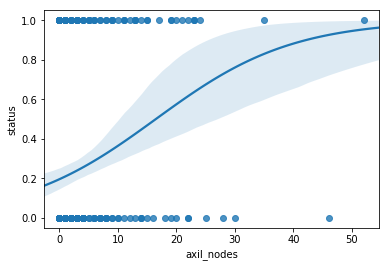

In [50]:
sns.regplot(x='axil_nodes', y='status', data=df, logistic=True)

In [55]:
new_observation = [[40, 64, 30]]
logreg.predict(new_observation)

array([1], dtype=int64)

In [54]:
logreg.predict_proba(new_observation)

array([[0.34697855, 0.65302145]])